In [1]:
import matplotlib.pyplot as plt
from ekpy import control
from ekpy.control.instruments import keysight81150a, keysightdsox3024a
from PVloop import FEHysteresis
import numpy as np
import time
from datetime import timedelta

2


In [2]:
rm = control.ResourceManager()
rm.list_resources()

('GPIB0::7::INSTR',
 'GPIB0::8::INSTR',
 'USB0::0x0957::0x17A6::MY63080078::0::INSTR')

In [3]:
scope = rm.open_resource('GPIB0::7::INSTR')
wavegen = rm.open_resource('GPIB0::8::INSTR')

In [4]:
keysightdsox3024a.idn(scope)

'AGILENT TECHNOLOGIES,DSO-X 3024A,MY63080078,02.65.2021030741\n'

In [5]:
keysight81150a.idn(wavegen)

'Agilent Technologies,81150A,MY53821602,3.0.0.0-4.6\n'

In [1]:
def wakeup_sherry_old(wavegen, channel='1', num_cycles='1e8', voltage='4', pulse_width='0.5e-6'):
    """
    This program will make a bipolar pulse and then configure it accordingly
    wavegen (pyvisa.resources.gpib.GPIBInstrument): Keysight 81150a
    channel (str): channel to output too ['1', '2']

    """
    basic_bipolar_pulse = [1,1,-1,-1] #basic pulse train
    keysight81150a.create_arb_wf(wavegen, basic_bipolar_pulse)
    frequency = 1/(2*float(pulse_width))
    keysight81150a.configure_arb_wf(wavegen, channel, freq=frequency, gain=voltage)
    keysight81150a.enable_output(wavegen, channel)
    total_wait_time = int(float(num_cycles)*(2* float(pulse_width)))
    time.sleep(total_wait_time)
    #time.sleep(10)
    keysight81150a.enable_output(wavegen, channel, False)

In [53]:
def wakeup_sherry(wavegen, channel='2', num_cycles='1e8', voltage='2', pulse_width='2e-6'):
    """
    This program will make a bipolar pulse and then configure it accordingly
    wavegen (pyvisa.resources.gpib.GPIBInstrument): Keysight 81150a
    channel (str): channel to output too ['1', '2']
    
    notes: do not need an offset by default half is positive half is negative. Also Voltage is measured from 0 to a peak
    not peak-to-peak even though the instrument panel says it is... Make sure to change cabling
    """
    frequency = 1/(2*float(pulse_width))
    keysight81150a.initialize(wavegen)
    keysight81150a.set_output_wf(wavegen, channel, 'squ', frequency, voltage)
    total_wait_time = int(float(num_cycles)*(2* float(pulse_width)))
    td_str = str(timedelta(seconds=total_wait_time))
    print("Estimated total wait time is: {}".format(td_str))
    print("Check cabling is good to go for wakeup")
    #check for user input if itme is ok
    affirmative = input("Print y if the allotted time is correct")
    if affirmative == 'y':
        keysight81150a.enable_output(wavegen, channel)
        time.sleep(total_wait_time)
        keysight81150a.enable_output(wavegen, channel, False)
        print("Make sure to check cabling is correct now")

In [54]:
wakeup_sherry(wavegen)

Estimated total wait time is: 0:06:40
Check cabling is good to go for wakeup
Make sure to check cabling is correct now


In [11]:
keysight81150a.enable_output(wavegen, '2', False)

In [55]:
exp_fe = FEHysteresis(wavegen,scope)

# specify run function (if desired)
# options are: run_function aka i havent added a different one


# config data path
exp_fe.config_path('./Data/Sherry Devices (JJ)/JJ_HZO_600_D1')

In [56]:
voltages = ['2'] 
scan_params = {
    'voltage':voltages
}

run_function_args = {
    'wavegen':wavegen,
    'scope':scope,
    'initial_delay':'5e-5',
    'pulse_delay':'5e-6',
    'freq': '10',
    'voltage':'2',
    'capacitor_area':'4e-8',
    'thickness':'10e-9',
    'permittivity':'30',
	'amplification':'8',
}

order = ['voltage',]

done.


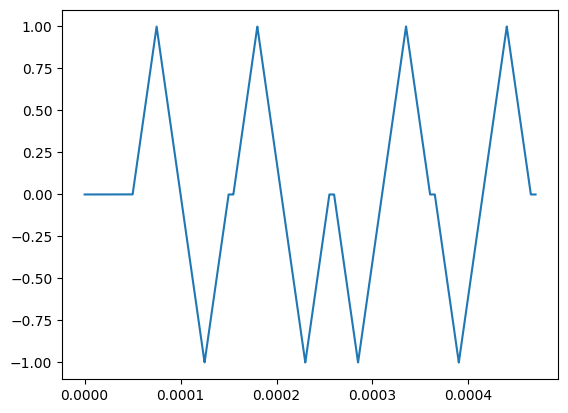

In [57]:
exp_fe.n_param_scan(scan_params, run_function_args, order, ntrials=1, plot=False)